# Exploratory Data Analysis of Indian Stock Market Performance (2020-2025)

# Introduction

#### This project analyzes the historical stock performance of three major Indian companies:

##### * Reliance Industries (RELIANCE.NS)
##### * Larsen & Toubro (LT.NS)
##### * Tata Consultancy Services (TCS.NS)

#### The analysis uses Python and the yfinance library to obtain the stock data. 
#### The analysis covers the period from January 1, 2020, to May 10, 2025.  Key aspects of the analysis include:

##### * Adjusted closing prices
##### * Normalized prices
##### * Daily returns
##### * Technical indicators (Simple Moving Average and Relative Strength Index)

#### The goal is to understand each stock's growth, volatility, and risk-reward profile during this period, which includes the COVID-19 pandemic and its subsequent market recovery.

# Importing Necessary Libraries

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# 1. Define Stock Tickers and Time Period

In [2]:
tickers = ["RELIANCE.NS", "LT.NS", "TCS.NS"]
start_date = "2020-01-01"
end_date = "2025-05-10"  # Using today's date

# 2. Download Historical Stock Data

In [3]:
data = yf.download(tickers, start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


# 3. Initial Data Inspection

### 3.1 Display the first few rows

In [4]:
print("\nFirst 5 rows of the downloaded data:")
data.head()


First 5 rows of the downloaded data:


Price             Close                                  High              \
Ticker            LT.NS RELIANCE.NS       TCS.NS        LT.NS RELIANCE.NS   
Date                                                                        
2020-01-01  1203.410278  682.694336  1983.747070  1211.632432  690.608469   
2020-01-02  1235.885254  694.316833  1974.641602  1238.365615  696.871981   
2020-01-03  1226.468872  695.153503  2013.994263  1235.563604  697.188565   
2020-01-06  1209.657104  679.031311  2013.811035  1223.666803  690.970284   
2020-01-07  1213.102173  689.477905  2018.753174  1230.556880  693.955027   

Price                            Low                                  Open  \
Ticker           TCS.NS        LT.NS RELIANCE.NS       TCS.NS        LT.NS   
Date                                                                         
2020-01-01  1998.664347  1197.025574  680.840224  1971.300515  1201.986409   
2020-01-02  1995.050197  1204.374867  683.779750  1966.908361  1205.293536   
2020-01-03  2034.448660  1221.967372  688.754345  1980.452947  1235.563604   
2020-01-06  2037.148163  1207.222610  677.448472  2002.325463  1222.748134   
2020-01-07  2026.806592  1206.901158  684.458056  1998.573377  1219.992189   

Price                                 Volume                       
Ticker     RELIANCE.NS       TCS.NS    LT.NS RELIANCE.NS   TCS.NS  
Date                                                               
2020-01-01  686.493125  1984.113053  3123998    14004468  1354908  
2020-01-02  683.779750  1995.050197  4335359    17710316  2380752  
2020-01-03  693.276690  1980.452947  2059871    20984698  4655761  
2020-01-06  687.397667  2017.975156  2646905    24519177  3023209  
2020-01-07  686.945339  2013.856863  2077893    16683622  2429317

### 3.2 Display the last few rows

In [5]:
print("\nLast 5 rows of the downloaded data:")
data.tail()


Last 5 rows of the downloaded data:


Price             Close                                   High               \
Ticker            LT.NS  RELIANCE.NS       TCS.NS        LT.NS  RELIANCE.NS   
Date                                                                          
2025-05-05  3330.199951  1431.300049  3454.300049  3350.000000  1439.500000   
2025-05-06  3334.000000  1420.900024  3460.000000  3353.000000  1432.000000   
2025-05-07  3321.399902  1406.000000  3445.100098  3339.800049  1424.400024   
2025-05-08  3323.899902  1407.000000  3448.899902  3366.000000  1420.800049   
2025-05-09  3443.899902  1377.199951  3440.300049  3477.000000  1394.800049   

Price                            Low                                   Open  \
Ticker           TCS.NS        LT.NS  RELIANCE.NS       TCS.NS        LT.NS   
Date                                                                          
2025-05-05  3504.500000  3300.699951  1426.900024  3446.399902  3350.000000   
2025-05-06  3473.000000  3302.800049  1410.599976  3437.000000  3346.000000   
2025-05-07  3459.500000  3284.100098  1402.699951  3420.600098  3332.000000   
2025-05-08  3477.000000  3299.800049  1398.000000  3428.699951  3310.100098   
2025-05-09  3446.199951  3331.000000  1374.500000  3398.100098  3331.000000   

Price                                  Volume                       
Ticker      RELIANCE.NS       TCS.NS    LT.NS RELIANCE.NS   TCS.NS  
Date                                                                
2025-05-05  1431.000000  3450.000000  1947332    12685649  1284443  
2025-05-06  1431.000000  3460.000000  1695516    14084117  1324763  
2025-05-07  1420.900024  3420.600098  2422707    13440169  1477128  
2025-05-08  1404.099976  3448.000000  3204333    16106175  2543591  
2025-05-09  1385.500000  3399.000000  5637694    13668904  2531757

### 3.3 Get basic information about the DataFrame

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1325 entries, 2020-01-01 to 2025-05-09
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Close, LT.NS)         1325 non-null   float64
 1   (Close, RELIANCE.NS)   1325 non-null   float64
 2   (Close, TCS.NS)        1325 non-null   float64
 3   (High, LT.NS)          1325 non-null   float64
 4   (High, RELIANCE.NS)    1325 non-null   float64
 5   (High, TCS.NS)         1325 non-null   float64
 6   (Low, LT.NS)           1325 non-null   float64
 7   (Low, RELIANCE.NS)     1325 non-null   float64
 8   (Low, TCS.NS)          1325 non-null   float64
 9   (Open, LT.NS)          1325 non-null   float64
 10  (Open, RELIANCE.NS)    1325 non-null   float64
 11  (Open, TCS.NS)         1325 non-null   float64
 12  (Volume, LT.NS)        1325 non-null   int64  
 13  (Volume, RELIANCE.NS)  1325 non-null   int64  
 14  (Volume, TCS.NS)       1325 non-null  

### 3.4  Get descriptive statistics for the adjusted closing prices

In [7]:
print("\nDescriptive Statistics for Closing Prices:")
data['Close'].describe()


Descriptive Statistics for Closing Prices:


Ticker,LT.NS,RELIANCE.NS,TCS.NS
count,1325.000000,1325.000000,1325.000000
mean,2154.663587,1118.841557,3182.950875
std,962.252511,227.883498,657.663818
min,659.433350,399.798615,1511.924438
25%,1420.362549,973.965332,2937.349365
50%,1876.808594,1146.316040,3240.215576
75%,3239.649902,1248.699951,3602.872070
max,3947.300049,1600.900024,4471.390137


# 4. Data Cleaning and Preparation 

In [8]:
adj_close = data['Close']
print("\nAdjusted Closing Prices DataFrame:")
adj_close.head()


Adjusted Closing Prices DataFrame:


Ticker,LT.NS,RELIANCE.NS,TCS.NS
Date,,,
2020-01-01,1203.410278,682.694336,1983.747070
2020-01-02,1235.885254,694.316833,1974.641602
2020-01-03,1226.468872,695.153503,2013.994263
2020-01-06,1209.657104,679.031311,2013.811035
2020-01-07,1213.102173,689.477905,2018.753174


# 5. Volume Sold Plot

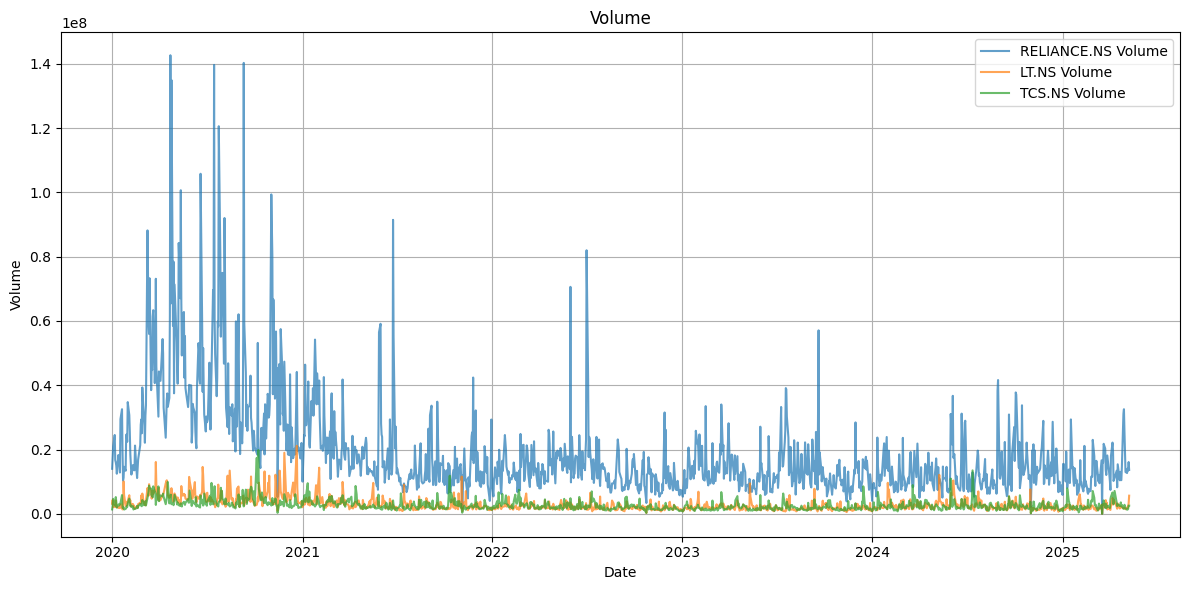

In [9]:
ohlc_data = data.copy()  # Create a copy to avoid modifying original data

# Plotting
plt.figure(figsize=(12, 6))  # Increased figure size to accommodate the new subplot

# Plot Volume
plt.plot(ohlc_data.index, ohlc_data['Volume']['RELIANCE.NS'], label='RELIANCE.NS Volume', alpha=0.7)
plt.plot(ohlc_data.index, ohlc_data['Volume']['LT.NS'], label='LT.NS Volume', alpha=0.7)
plt.plot(ohlc_data.index, ohlc_data['Volume']['TCS.NS'], label='TCS.NS Volume', alpha=0.7)
plt.title(f"Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Volume Sold Analysis (2020-2025)

### Observation:

##### -> The graph displays the trading volume for Reliance Industries (RELIANCE.NS), Larsen & Toubro (LT.NS), and Tata Consultancy Services (TCS.NS) from 2020 to 2025.
##### -> RELIANCE.NS generally exhibits a significantly higher trading volume compared to LT.NS and TCS. There are periods of very high volume for RELIANCE.NS, particularly in early 2021.
##### -> LT.NS and TCS show relatively lower and more consistent trading volumes throughout the period.

### Potential Hypothesis:

##### -> Higher trading volume in RELIANCE.NS could indicate greater investor interest and liquidity in this stock. The spikes in volume might be associated with specific news events, market trends, or large transactions.
##### -> The comparatively lower and stable volume in LT.NS and TCS might suggest less volatility.

### Potential Conclusion:

##### -> RELIANCE.NS experienced substantially more trading activity than LT.NS and TCS, implying greater market participation and potential price volatility. The volume spikes observed for RELIANCE.NS warrant further investigation into the specific events that may have triggered them.
##### -> LT.NS and TCS demonstrate lower trading volumes, suggesting relatively less liquidity and potentially more stable price movements.

# 6. Price Trend Analysis

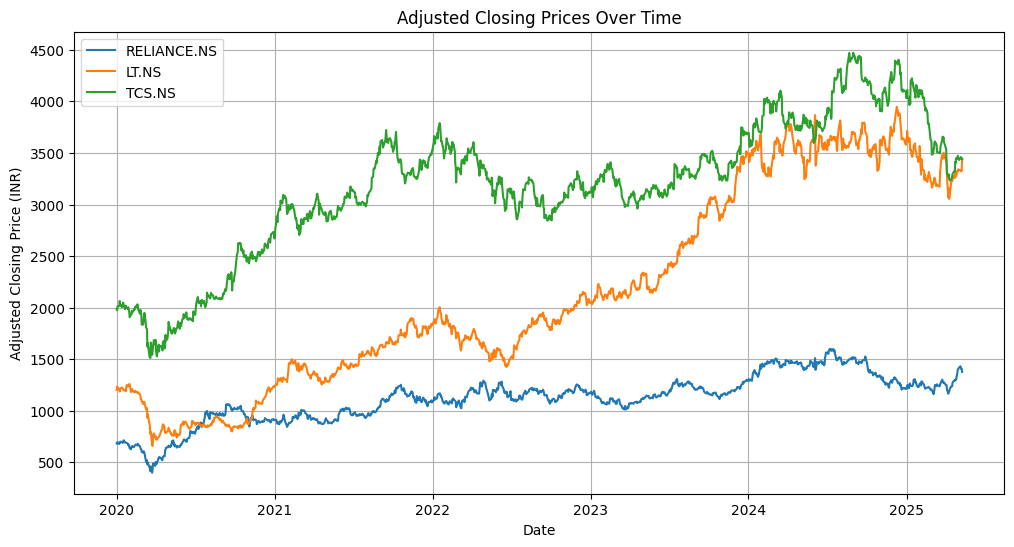

In [10]:
plt.figure(figsize=(12, 6))

for ticker in tickers:
    plt.plot(adj_close.index, adj_close[ticker], label=ticker)
plt.title("Adjusted Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price (INR)")
plt.legend()
plt.grid(True)
plt.show()

## Adjusted Closing Prices Over Time (2020-2025):

### Observation: 
##### -> Initial COVID-19 dip and recovery for all, followed by LT.NS outperformance (driven by sector) then recent decline, gradual TCS growth, and moderate Reliance growth.

### Potential Hypothesis: 
##### -> Pandemic affected all initially; LT.NS's sector grew strongly then corrected; TCS benefited from IT growth; Reliance's diverse business led to moderate gains.

### Potential Conclusion: 
##### -> LT.NS was strongest but volatile due to sector; TCS had steady, sector-driven growth; Reliance was most stable, with lower overall gains.

# 7. Normalized Price PLots

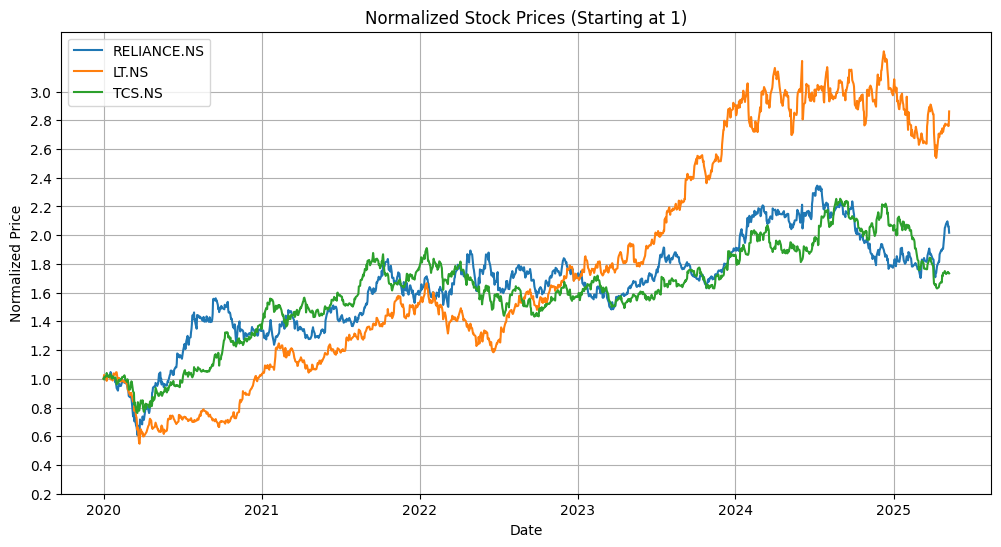

In [11]:
normalized_prices = adj_close / adj_close.iloc[0]
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(normalized_prices.index, normalized_prices[ticker], label=ticker)
plt.title("Normalized Stock Prices (Starting at 1)")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.yticks([0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0])
plt.legend()
plt.grid(True)
plt.show()

## Normalized Stock Prices (Starting at 1) (2020-2025):

### Observation: 
##### -> The plot shows LT.NS demonstrating the most substantial overall increase from its initial value, especially from around 2022 onwards. 
##### -> TCS also shows growth, but it's less pronounced than LT.NS. Reliance shows growth, but it is considerably less than LT.NS and TCS.

### Potential Hypothesis: 
##### -> LT.NS's performance suggests it delivered the highest return relative to its starting price during this per

### Potential Conclusion: 
##### -> Investors seeking higher relative returns over this period would have seen the most significant gains with LT.NS. TCS also provided a reasonable return. Reliance provided the lowest return.

# 8. Volatility Analysis (Distribution of Daily Returns) 

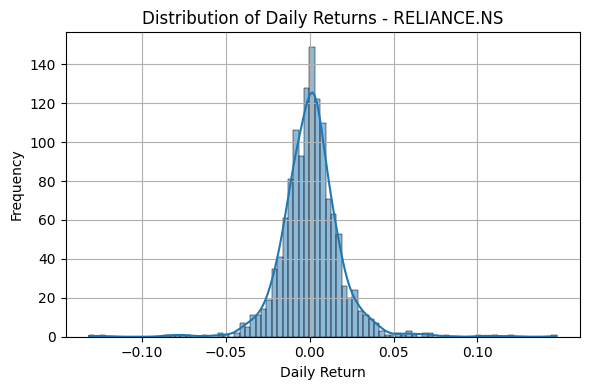

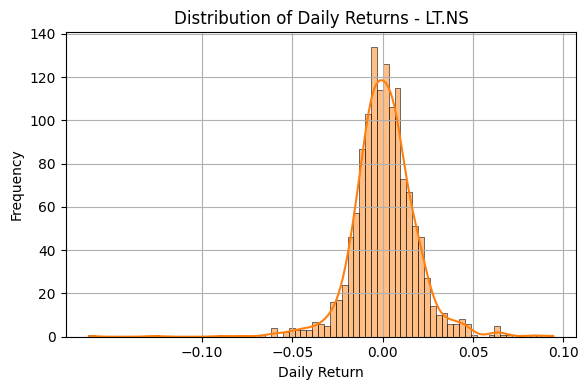

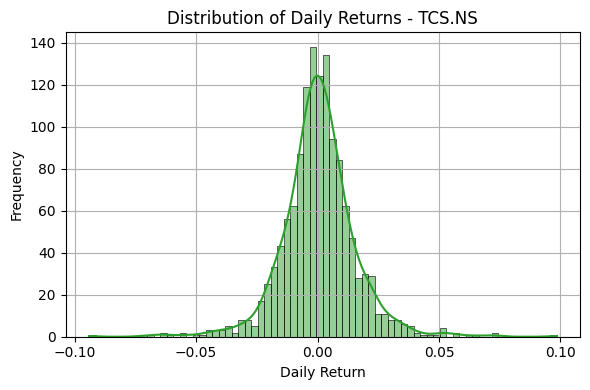

In [12]:
returns = adj_close.pct_change().dropna()

color_map = {
    "RELIANCE.NS": "tab:blue",
    "LT.NS": "tab:orange",
    "TCS.NS": "tab:green"
}

for ticker in tickers:
    plt.figure(figsize=(6, 4),dpi=100)
    color = color_map.get(ticker)
    sns.histplot(returns[ticker], kde=True, color=color)
    plt.title(f"Distribution of Daily Returns - {ticker}")
    plt.xlabel("Daily Return")
    plt.ylabel("Frequency")
    plt.xticks([-0.10,-0.05,0,0.05,0.10])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Distribution of Daily Returns (2020-2025):

### Observation: 
##### -> All three histograms show that daily returns are concentrated around 0, indicating that most daily price changes are small.
##### -> Reliance and TCS distributions appear more peaked around zero, suggesting a higher frequency of very small daily changes compared to LT.NS.
##### -> LT.NS shows a wider spread of daily returns, with more occurrences of larger positive and negative changes, indicating higher volatility. The tails of the LT.NS histogram extend further than those of Reliance and TCS.

### Potential Hypothesis: 
##### -> Reliance and TCS exhibit lower volatility, with a larger proportion of very small daily price changes.
##### -> LT.NS demonstrates higher volatility, with a greater likelihood of experiencing larger daily price swings.

### Potential Conclusion: 
##### -> Investors in Reliance and TCS experienced more stability in daily returns, with a higher probability of very small changes.
##### -> LT.NS carries a higher risk due to the increased frequency of larger daily price fluctuations.

# 9. Volatility Analysis (Box plot for Daily Returns)

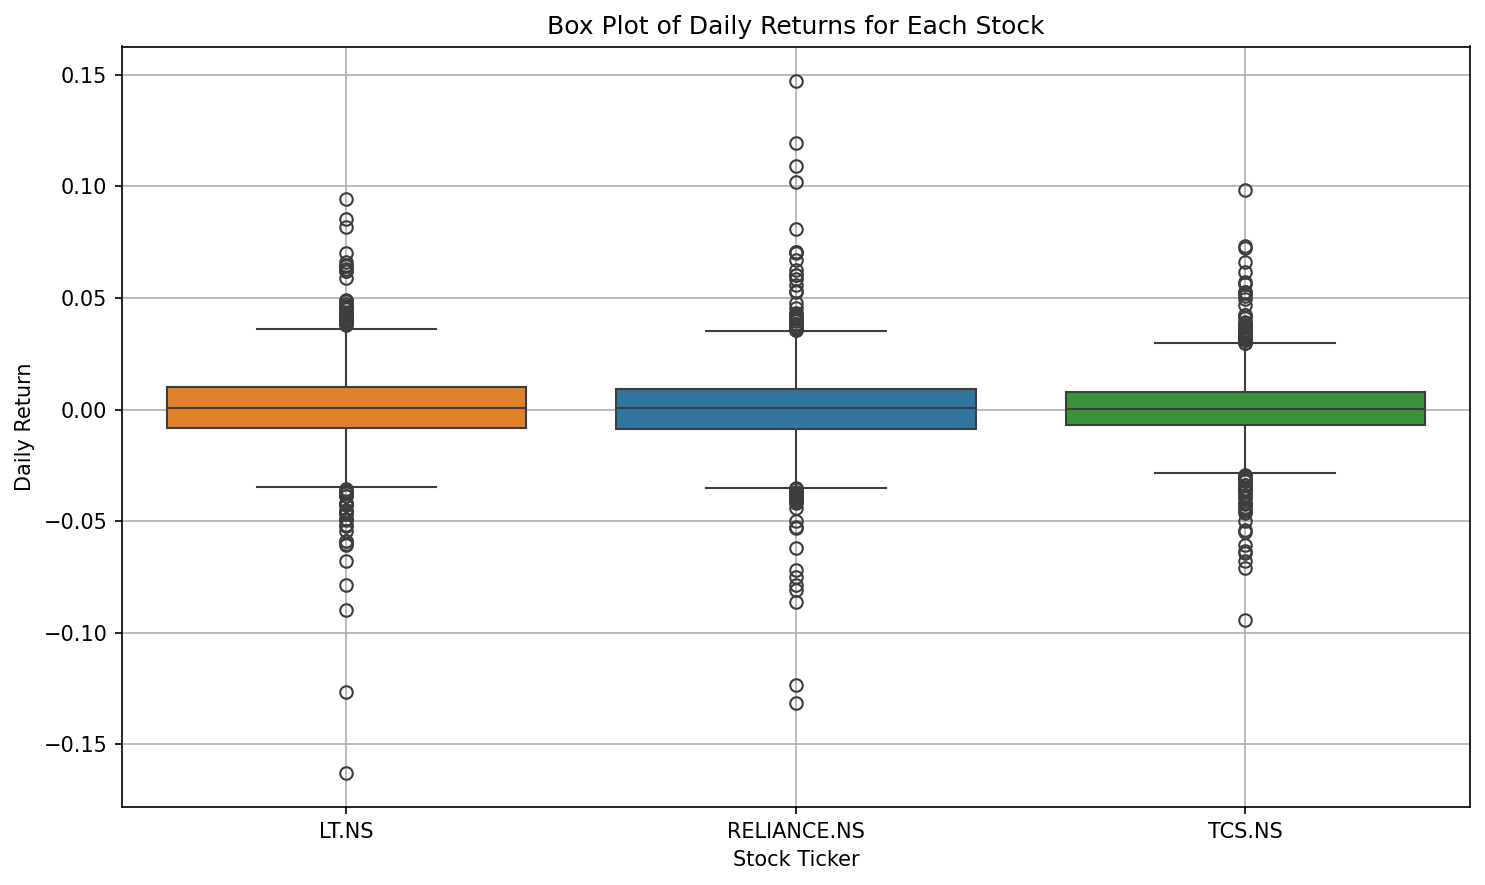

In [13]:
plt.figure(figsize=(10, 6),dpi = 150)
sns.boxplot(data=returns, palette=color_map)
plt.title("Box Plot of Daily Returns for Each Stock")
plt.xlabel("Stock Ticker")
plt.ylabel("Daily Return")
plt.grid(True)
plt.tight_layout()
plt.show()

### Displaying Information of the Box Plot 
### [Boxes, Whiskers and Outliers]

In [14]:
def get_boxplot_stats(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = series[(series < lower_bound) | (series > upper_bound)].tolist()
    return {
        'Q1': q1,
        'Q3': q3,
        'IQR': iqr,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers': outliers,
        'min': series.min(),  # Added minimum
        'max': series.max(),  # Added maximum
    }

# Calculate and print box plot statistics for each stock
print("\nBox Plot Statistics (Daily Returns):")
for ticker in tickers:
    print(f"\n{ticker}:")
    stats = get_boxplot_stats(returns[ticker])
    for key, value in stats.items():
        if key != 'outliers':
            print(f"  {key}: {value}")
        else:
            print(f"  {key}: {len(value)} outliers")  # Print the number of outliers


Box Plot Statistics (Daily Returns):

RELIANCE.NS:
  Q1: -0.008671480839495899
  Q3: 0.008985176191421307
  IQR: 0.017656657030917206
  lower_bound: -0.03515646638587171
  upper_bound: 0.035470161737797115
  outliers: 63 outliers
  min: -0.1315388478661098
  max: 0.14718035973851107

LT.NS:
  Q1: -0.008163120221876874
  Q3: 0.009912696692050416
  IQR: 0.01807581691392729
  lower_bound: -0.03527684559276781
  upper_bound: 0.03702642206294135
  outliers: 67 outliers
  min: -0.16265762766455893
  max: 0.09435191488444161

TCS.NS:
  Q1: -0.00681960243954946
  Q3: 0.007874197403863414
  IQR: 0.014693799843412875
  lower_bound: -0.028860302204668772
  upper_bound: 0.029914897168982726
  outliers: 75 outliers
  min: -0.09410354990508818
  max: 0.0984509132922402


## Box Plot of Daily Returns for Each Stock (2020-2025):

### Observation:

##### -> The box plot visualizes the distribution of daily returns for each stock using boxes, whiskers, and outliers.
##### -> The height of the boxes (representing the interquartile range or IQR) for Reliance and TCS is smaller than that of LT.NS. This indicates that the middle 50% of daily returns for Reliance and TCS are more concentrated around the median compared to LT.NS.
##### -> The whiskers for LT.NS extend farther than those for Reliance and TCS. This suggests a wider range of typical daily returns for LT.NS.
##### -> LT.NS has more data points plotted as outliers, indicating a higher frequency of unusually large or small daily returns compared to Reliance and TCS.

### Potential Hypothesis:

##### ->LT.NS exhibits higher volatility, characterized by a wider spread of both typical and extreme daily returns.
##### -> Reliance and TCS demonstrate lower volatility, with daily returns more tightly clustered around the median and fewer extreme values.

### Potential Conclusion:

##### -> Investors in LT.NS experienced a greater degree of variability in daily returns, including a higher likelihood of both substantial gains and losses.
##### -> Reliance and TCS offered more stability in daily performance, with less frequent large fluctuations.

# 10.  Technical Indicator: Simple Moving Average (SMA)

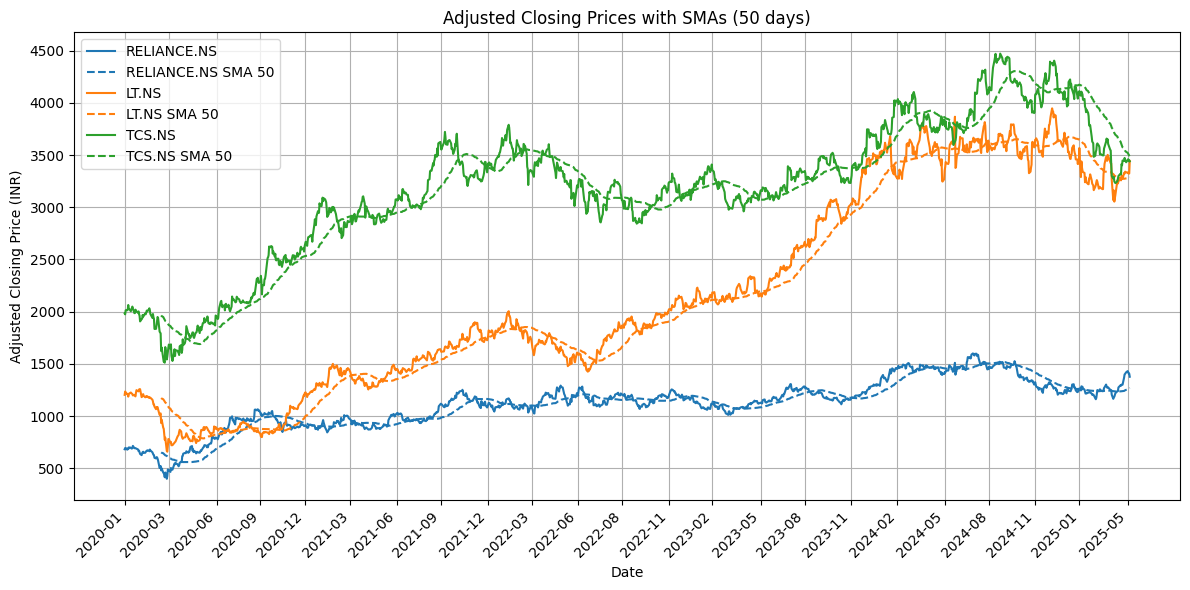

In [15]:
def calculate_sma(data, window):
    return data.rolling(window=window).mean()

window = 50
dates = adj_close.index[::60]

sma = pd.DataFrame()

for ticker in tickers:
    sma[ticker] = calculate_sma(adj_close[ticker], window)

plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(adj_close.index, adj_close[ticker], label=ticker, color=color_map.get(ticker))
    plt.plot(sma.index, sma[ticker], label=f'{ticker} SMA {window}', linestyle='--')
plt.title(f"Adjusted Closing Prices with SMAs ({window} days)")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price (INR)")
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(dates,rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Adjusted Closing Prices with SMAs (50-day) (2020-2025):

### Observation: 
##### -> The plot shows adjusted closing prices and their 50-day Simple Moving Averages (SMAs), which smooth short-term fluctuations to reveal longer-term trends. 
##### -> Periods where the price is above/below the SMA indicate upward/downward trends. LT.NS generally trends above its SMA (indicating overall upward movement), though it dips below in late 2024/25. TCS fluctuates around its SMA. Reliance stays relatively close to its SMA, showing less pronounced trends.

### Potential Hypothesis:
##### -> The 50-day SMA highlights the medium-term price trend. Price crossovers above/below the SMA may suggest trend changes.


### Potential Conclusions:
##### -> LT.NS experienced a strong upward trend, especially mid-period, but has recently declined. TCS shows more volatility around its medium-term trend. Reliance exhibits the least volatility, staying near its 50-day average.

# Final Conclusion

#### This analysis of Reliance Industries (RELIANCE.NS), Larsen & Toubro (LT.NS), and Tata Consultancy Services (TCS.NS) reveals distinct performance and risk profiles over the period from 2020 to mid-2025.

##### -> Larsen & Toubro (LT.NS) demonstrated the strongest overall growth, suggesting it was significantly influenced by favorable sector-specific trends (likely in construction and infrastructure) during this time. However, LT.NS also exhibited the highest volatility, indicating a greater degree of risk due to larger daily price swings and more frequent extreme returns.

##### -> Tata Consultancy Services (TCS.NS) showed steady, moderate growth, reflecting the expansion of the IT sector. TCS displayed moderate volatility, indicating a more stable investment compared to LT.NS.

##### -> Reliance Industries (RELIANCE.NS) offered the most stability, characterized by lower volatility and more consistent daily returns. However, Reliance also provided the lowest overall growth among the three stocks.

##### In summary, LT.NS presented the highest potential return but also carried the greatest risk, driven by sector-specific factors. TCS offered a balance of steady growth and moderate risk, aligning with the IT sector's performance. Reliance provided the most stability but with the least growth.